<a href="https://colab.research.google.com/github/vardhan2303A52384/Exp-AI/blob/main/online_shoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

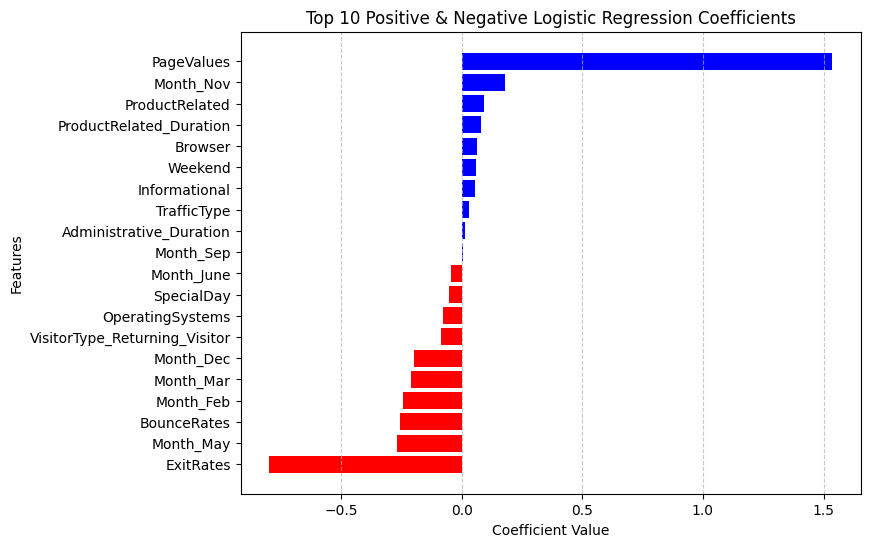

In [4]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename below to match inside archive
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
# Assume target is "Revenue"
target = "Revenue"
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Train Logistic Regression
# -------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------
# 4. Extract Coefficients
# -------------------------
coef = model.coef_[0]
features = X.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
})

# Sort coefficients
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# -------------------------
# 5. Plot Top Features
# -------------------------
top_features = pd.concat([coef_df.head(10), coef_df.tail(10)])
top_features = top_features.sort_values(by="Coefficient")

plt.figure(figsize=(8, 6))
plt.barh(
    top_features["Feature"],
    top_features["Coefficient"],
    color=np.where(top_features["Coefficient"] > 0, "blue", "red")
)
plt.title("Top 10 Positive & Negative Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

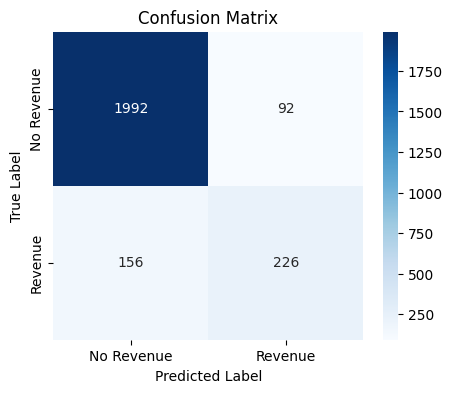

/tmp/ipython-input-1995395348.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


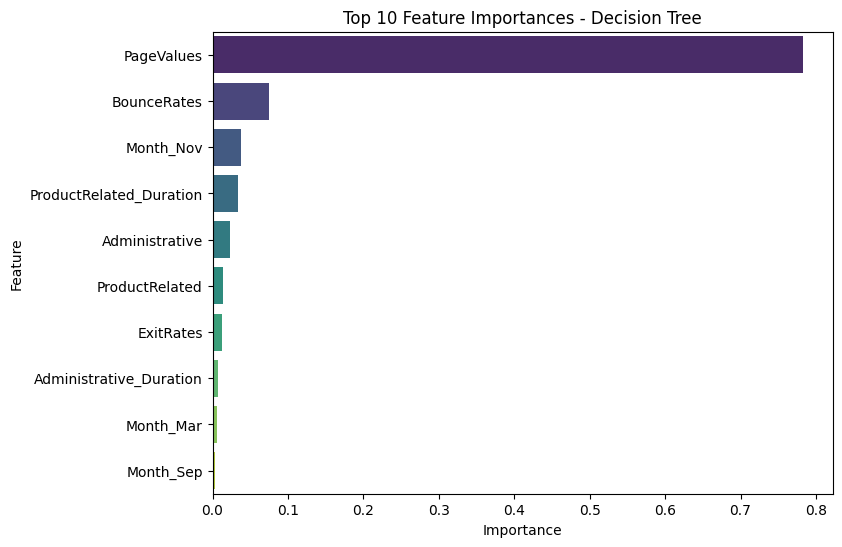

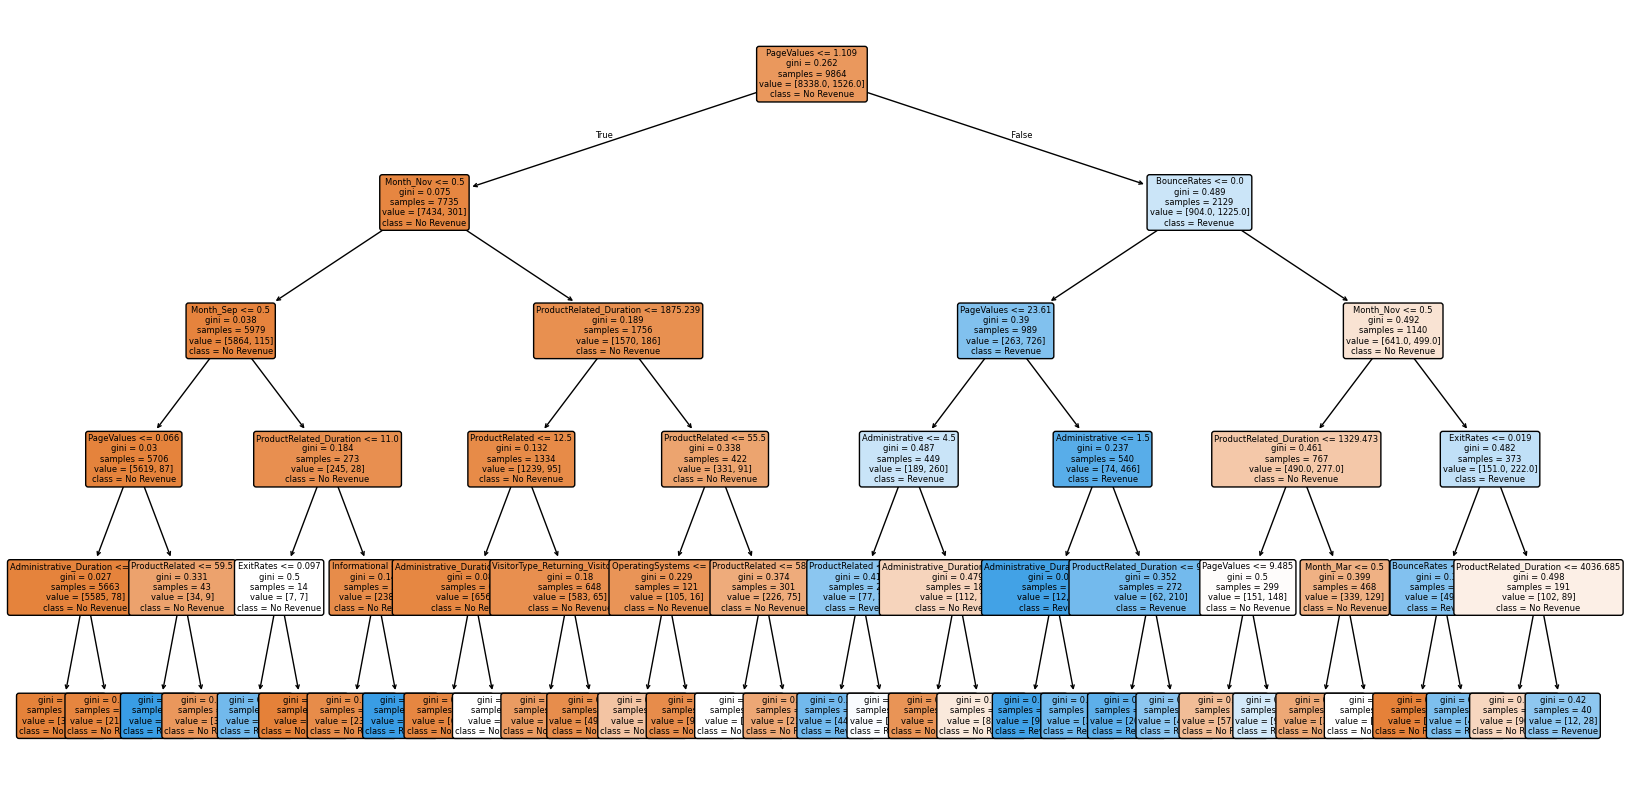

In [5]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"   # your dataset zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename if needed
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
target = "Revenue"   # binary classification target
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 3. Train Decision Tree
# -------------------------
dt_model = DecisionTreeClassifier(
    criterion="gini",     # or "entropy"
    max_depth=5,          # limit depth to prevent overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# -------------------------
# 4. Evaluate Model
# -------------------------
y_pred = dt_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Revenue","Revenue"], yticklabels=["No Revenue","Revenue"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -------------------------
# 5. Feature Importance
# -------------------------
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -------------------------
# 6. Visualize Decision Tree
# -------------------------
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Revenue","Revenue"], filled=True, rounded=True, fontsize=6)
plt.show()


Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

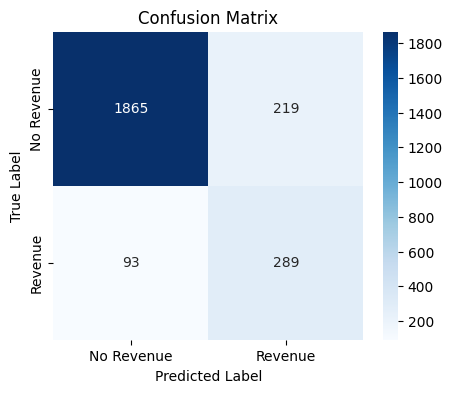

/tmp/ipython-input-622508781.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


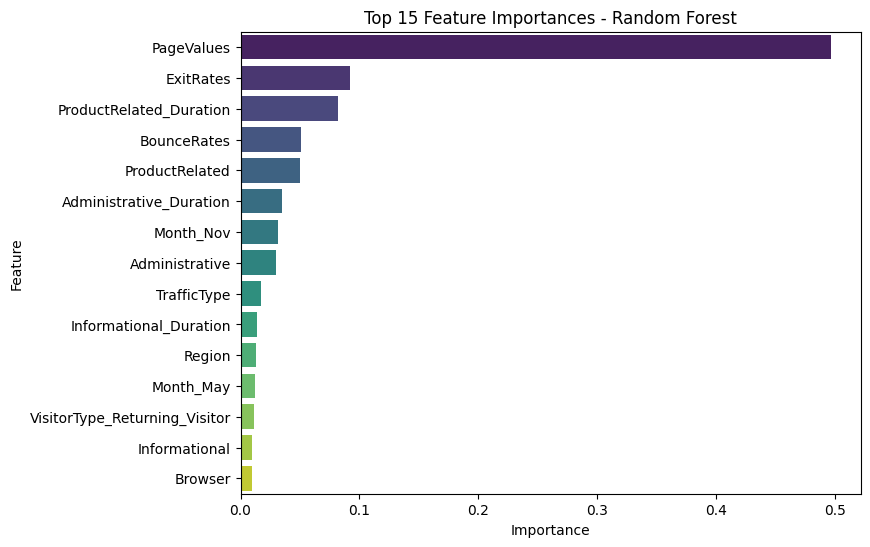

In [6]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"   # your dataset zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename if needed
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
target = "Revenue"   # target variable
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 3. Train Random Forest
# -------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=10,          # limit depth to avoid overfitting
    random_state=42,
    class_weight="balanced"  # handles imbalance in dataset
)
rf_model.fit(X_train, y_train)

# -------------------------
# 4. Evaluate Model
# -------------------------
y_pred = rf_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Revenue","Revenue"], yticklabels=["No Revenue","Revenue"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -------------------------
# 5. Feature Importance
# -------------------------
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:23:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Accuracy: 0.894566098945661

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94      2084
        True       0.69      0.58      0.63       382

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



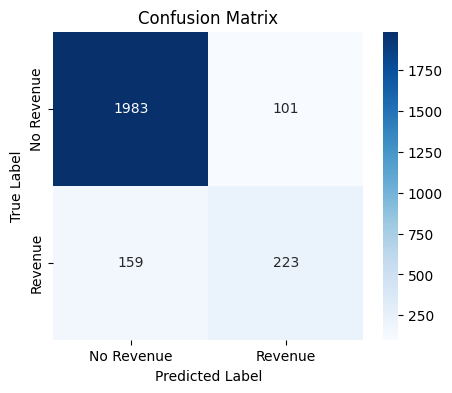

<Figure size 1000x800 with 0 Axes>

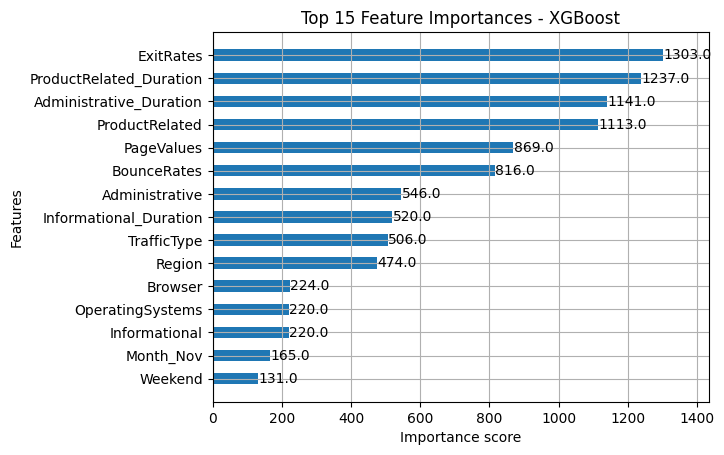

In [7]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"   # your dataset zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename if needed
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
target = "Revenue"   # target variable
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 3. Train XGBoost Model
# -------------------------
xgb_model = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    max_depth=6,             # depth of trees
    learning_rate=0.1,       # step size shrinkage
    subsample=0.8,           # sample ratio of training instances
    colsample_bytree=0.8,    # subsample ratio of columns
    eval_metric="logloss",   # evaluation metric
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# -------------------------
# 4. Evaluate Model
# -------------------------
y_pred = xgb_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Revenue","Revenue"], yticklabels=["No Revenue","Revenue"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -------------------------
# 5. Feature Importance
# -------------------------
plt.figure(figsize=(10,8))
plot_importance(xgb_model, importance_type="weight", max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()


Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

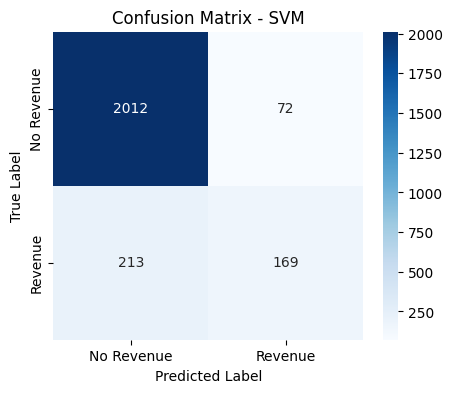

In [8]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"   # your dataset zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename if needed
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
target = "Revenue"
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Train SVM Classifier
# -------------------------
svm_model = SVC(
    kernel="rbf",        # "linear", "poly", "rbf", "sigmoid"
    C=1.0,               # regularization parameter
    gamma="scale",       # kernel coefficient
    probability=True,    # enable probability estimates
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

# -------------------------
# 4. Evaluate Model
# -------------------------
y_pred = svm_model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Revenue","Revenue"],
            yticklabels=["No Revenue","Revenue"])
plt.title("Confusion Matrix - SVM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Accuracy: 0.8751013787510138

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.93      0.93      2084
        True       0.60      0.56      0.58       382

    accuracy                           0.88      2466
   macro avg       0.76      0.75      0.75      2466
weighted avg       0.87      0.88      0.87      2466



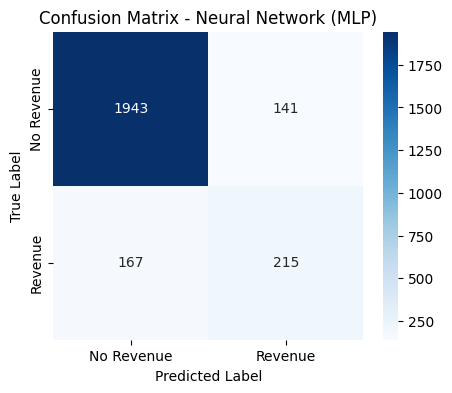

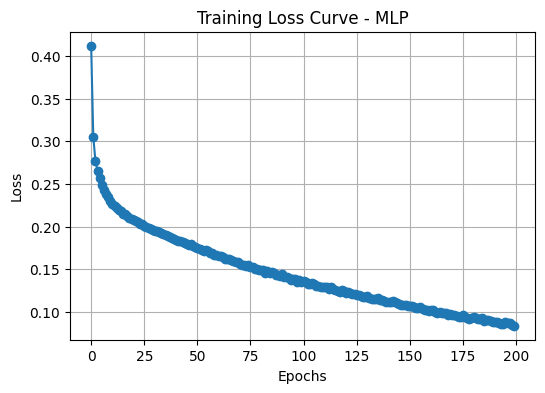

In [9]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Extract and Load Dataset
# -------------------------
zip_path = "/content/archive.zip"   # your dataset zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# ⚠️ Change filename if needed
csv_file = "/content/data/online_shoppers_intention.csv"
df = pd.read_csv(csv_file)

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2. Preprocess Data
# -------------------------
target = "Revenue"
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (critical for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Train Neural Network (MLP)
# -------------------------
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # two hidden layers (64 and 32 neurons)
    activation="relu",            # relu activation
    solver="adam",                # optimizer
    learning_rate="adaptive",     # adjusts learning rate automatically
    max_iter=200,                 # training epochs
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# -------------------------
# 4. Evaluate Model
# -------------------------
y_pred = mlp_model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Revenue","Revenue"],
            yticklabels=["No Revenue","Revenue"])
plt.title("Confusion Matrix - Neural Network (MLP)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -------------------------
# 5. Loss Curve (Training Progress)
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(mlp_model.loss_curve_, marker="o")
plt.title("Training Loss Curve - MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
